In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.stats import zscore
import seaborn as sns

In [3]:
custData = pd.read_csv("Cust_Spend_Data.csv")

In [4]:
custData.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [5]:
custData.size

70

In [6]:
custData.shape

(10, 7)

In [7]:
custDataAttr = custData.iloc[:,2:]

In [8]:
custDataAttr.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3


In [10]:
custDataScaled = custDataAttr.apply(zscore)

In [11]:
custDataScaled.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033


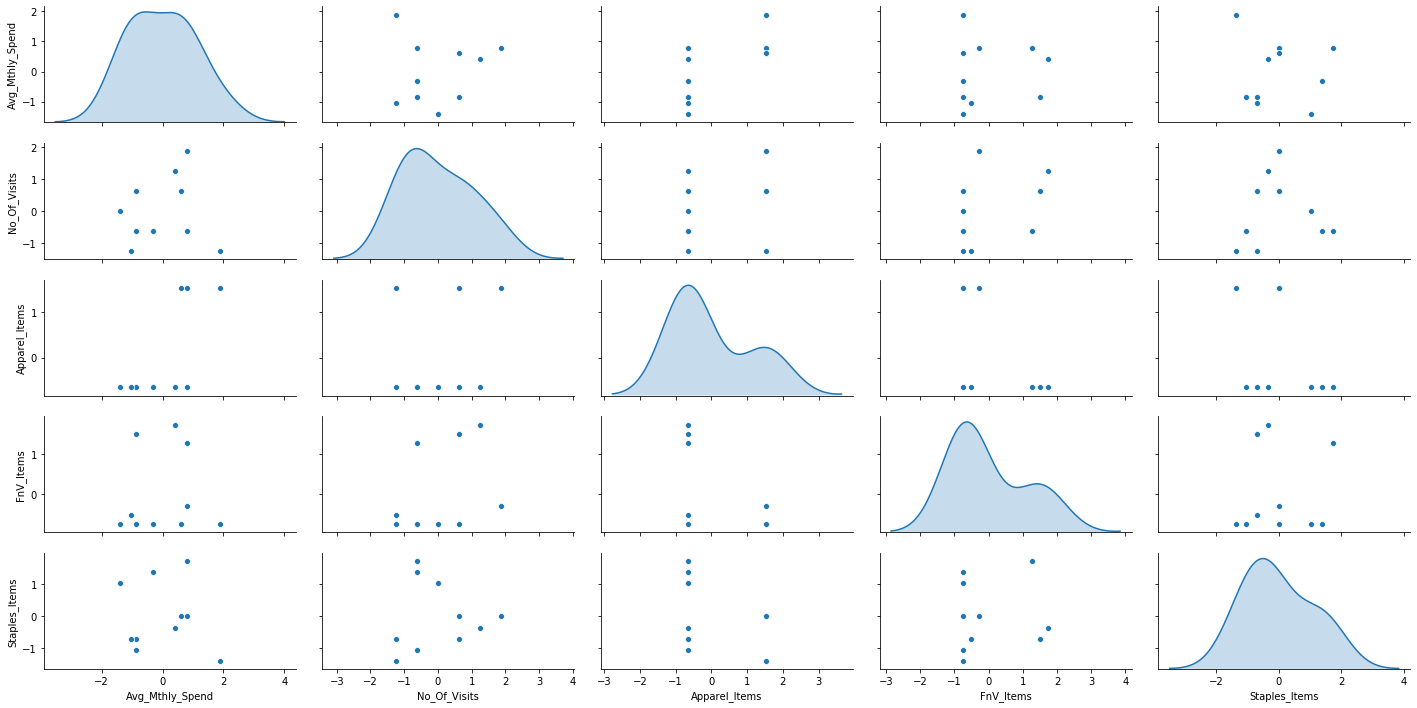

In [18]:
sns.pairplot(custDataScaled, height=2, aspect=2, diag_kind='kde')

In [19]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')

In [21]:
model.fit(custDataScaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [22]:
custDataAttr['labels'] = model.labels_
custDataAttr.head(10)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,labels
0,10000,2,1,1,0,0
1,7000,3,0,10,9,1
2,7000,7,1,3,4,0
3,6500,5,1,1,4,0
4,6000,6,0,12,3,1
5,4000,3,0,1,8,2
6,2500,5,0,11,2,1
7,2500,3,0,1,1,2
8,2000,2,0,2,2,2
9,1000,4,0,1,7,2


In [24]:
custDataClust = custDataAttr.groupby(['labels'])

In [25]:
custDataClust.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
labels,,,,,
0,7833.333333,4.666667,1.0,1.666667,2.666667
1,5166.666667,4.666667,0.0,11.000000,4.666667
2,2375.000000,3.000000,0.0,1.250000,4.500000


In [26]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [28]:
z = linkage(custDataScaled, metric = 'euclidean', method = 'average')
c, coph_dist = cophenet(z, pdist(custDataScaled))

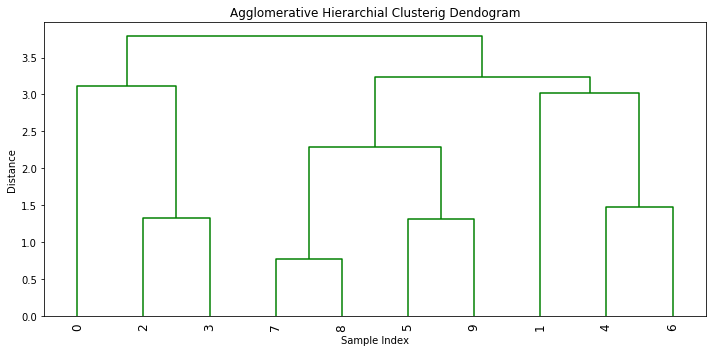

In [32]:
plt.figure(figsize=(10, 5))
plt.title("Agglomerative Hierarchial Clusterig Dendogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
dendrogram(z, leaf_rotation=90., color_threshold = 40)
plt.tight_layout()